<a href="https://colab.research.google.com/github/dyugong/Data_Science_Basic/blob/main/JurySelection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# 랜덤 넘버 제너레이터 시작~~
#np.random.seed(3)


In [ ]:
jury = Table().with_columns(
'Ethnicity', make_array('Asian', 'Black', 'Latino', 'White',
'Other'),
'Eligible', make_array(0.15, 0.18, 0.12, 0.54, 0.01),
'Panels', make_array(0.26, 0.08, 0.08, 0.54, 0.04)
)
jury

Ethnicity,Eligible,Panels
Asian,0.15,0.26
Black,0.18,0.08
Latino,0.12,0.08
White,0.54,0.54
Other,0.01,0.04


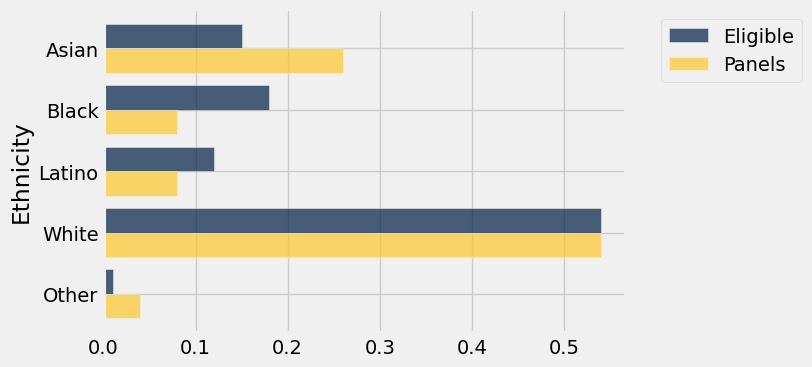

In [ ]:
jury.barh('Ethnicity')

In [ ]:
# Augment the table with a column of differences between proportions
jury_with_diffs = jury.with_column(
'Difference', jury.column('Panels') - jury.column('Eligible')
)
jury_with_diffs

Ethnicity,Eligible,Panels,Difference
Asian,0.15,0.26,0.11
Black,0.18,0.08,-0.1
Latino,0.12,0.08,-0.04
White,0.54,0.54,0
Other,0.01,0.04,0.03


In [ ]:
jury_with_diffs = jury_with_diffs.with_column(
'Abs. Difference',
np.abs(jury_with_diffs.column('Difference'))
)
jury_with_diffs

Ethnicity,Eligible,Panels,Difference,Abs. Difference
Asian,0.15,0.26,0.11,0.11
Black,0.18,0.08,-0.1,0.1
Latino,0.12,0.08,-0.04,0.04
White,0.54,0.54,0,0
Other,0.01,0.04,0.03,0.03


In [ ]:
jury_with_diffs.column('Abs. Difference').sum()/2

0.14000000000000001

In [ ]:
def total_variation_distance(distribution_1, distribution_2):
  return np.abs(distribution_1 - distribution_2).sum()/2

In [ ]:
def table_tvd(table, label, other):
  return total_variation_distance(table.column(label), table.column(other))

table_tvd(jury, 'Eligible', 'Panels')

0.14000000000000001

In [ ]:
panel_size = 1453
#panels_and_sample = proportions_from_distribution(jury, 'Panels', panel_size)
panels_and_sample = proportions_from_distribution(jury, 'Eligible', panel_size)

panels_and_sample

Ethnicity,Eligible,Panels,Random Sample
Asian,0.15,0.26,0.157605
Black,0.18,0.08,0.189264
Latino,0.12,0.08,0.118376
White,0.54,0.54,0.523744
Other,0.01,0.04,0.0110117


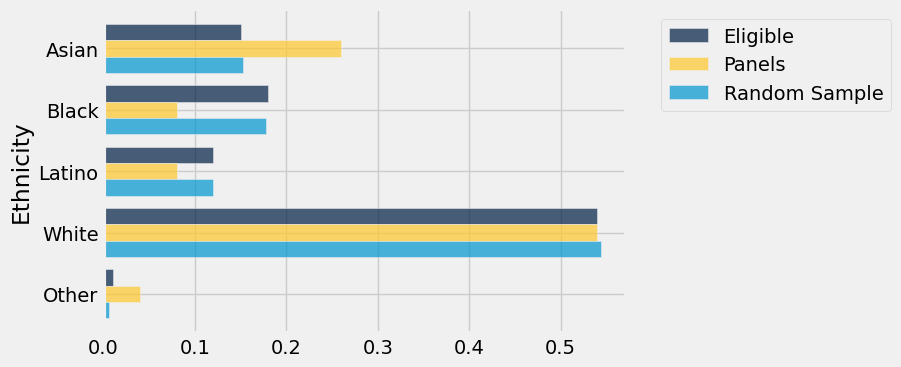

In [ ]:
panels_and_sample.barh('Ethnicity')

In [ ]:
table_tvd(panels_and_sample, 'Eligible', 'Random Sample')

0.006490020646937331

In [ ]:
# Compute empirical distribution of TVDs
panel_size = 1453
repetitions = 5000
tvds = make_array()
for i in np.arange(repetitions):
  new_sample = proportions_from_distribution(jury, 'Eligible', panel_size)
  tvds = np.append(tvds, table_tvd(new_sample, 'Eligible', 'Random Sample'))

results = Table().with_column('TVD', tvds)
results

TVD
0.0120578
0.0115898
0.0208603
0.0213833
0.0163042
0.0131796
0.0239849
0.0248864
0.00460427
0.0239849


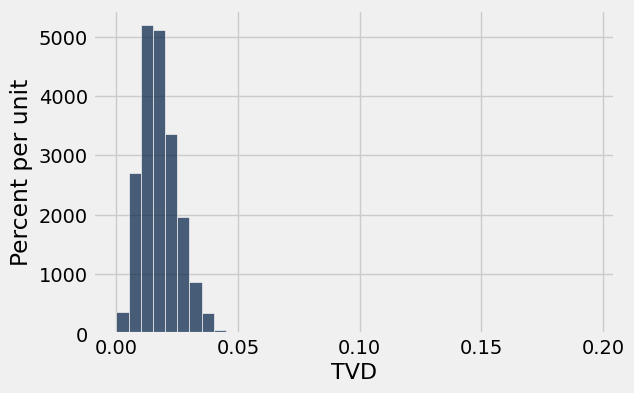

In [ ]:
results.hist(bins=np.arange(0, 0.2, 0.005))